In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [213]:
def mse(y_predict, test_y):#均方误差
    return np.mean((y_predict - test_y) ** 2)

In [214]:
def mae(y_predict, test_y):#绝对误差
    return np.mean(np.abs(y_predict - test_y))#np.abs绝对值函数

In [215]:
#最小二乘法
def least_squares(w,train_x,train_y):
    XTX_f1=np.linalg.inv(np.dot(train_x.T,train_x))# 求(XT,x)-1
    w=np.dot( np.dot(XTX_f1,train_x.T) ,train_y)
    return w

In [216]:
#梯度下降法
def decent(Xtrain, Ytrain, w, alpha, epochs,test_x,test_y):#计算预测值
    m=len(Ytrain)  #获取样本数
    mse_array=[]    #创建均方误差的列表
    mae_array=[]    #创建绝对误差的列表
    lowest_mse=999999.0  #初始化最低的MSE值为正无穷大
    lowest_mae=999999.0  #初始化最低的MAE值为正无穷大
    mse_epoch=0  #初始化最低MSE值对应的迭代次数
    mae_epoch=0  #初始化最低MAE值对应的迭代次数
    mse_epoch=0  #初始化最低MSE值对应的迭代次数
    mae_epoch=0  #初始化最低MAE值对应的迭代次数
    mse_w=None #MSE下最好参数向量
    mae_w=None #MAE下最好参数向量
    for epoch in range(epochs):
        y_hat=np.dot(Xtrain, w)  #X 400x14 w 14x1
        error=y_hat-Ytrain  #计算误差
        gradient=np.dot(Xtrain.T,error)/m   #计算梯度,不是最小二乘法    2XT(Xw-y),2约掉，Xw就是y_predict,Xw-y就是error,除以m可以进行归一化控制梯度更新幅度
        w=w-alpha*gradient  #使用梯度下降法更新权重
        y_predict=np.dot(test_x, w) #算出对测试集的预测值
        #错误值判断
        mse_val=mse(y_predict, test_y)  #均方误差
        mse_array.append(mse_val)   #将均方误差添加到数组中
        mae_val=mae(y_predict, test_y)  #绝对误差
        mae_array.append(mae_val)   #将绝对误差添加到数组中
        if mse_val<lowest_mse:
            lowest_mse=mse_val
            mse_epoch=epoch+1  #函数操作的range,左闭右开,所以mse_epoch最好加1
            mse_w=w.copy()
            
        if mae_val<lowest_mae:
            lowest_mae=mae_val
            mae_epoch=epoch+1 
            mae_w=w.copy()
    return mse_w,mse_array,lowest_mse,mse_epoch,     mae_w,mae_array,lowest_mae,mae_epoch,w

In [217]:
data=pd.read_csv('housing.csv')
null_counts = data.isnull().sum()#判断空值
print(null_counts)
data=data.sample(frac=1).reset_index(drop=True)#打乱data顺序,保证测试集和训练集的随机性
correlation=data.corr()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE   
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734  \
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

E:\Sd\sd-webui-aki\sd-webui-aki-v4.2\sd-webui-aki-v4.2\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


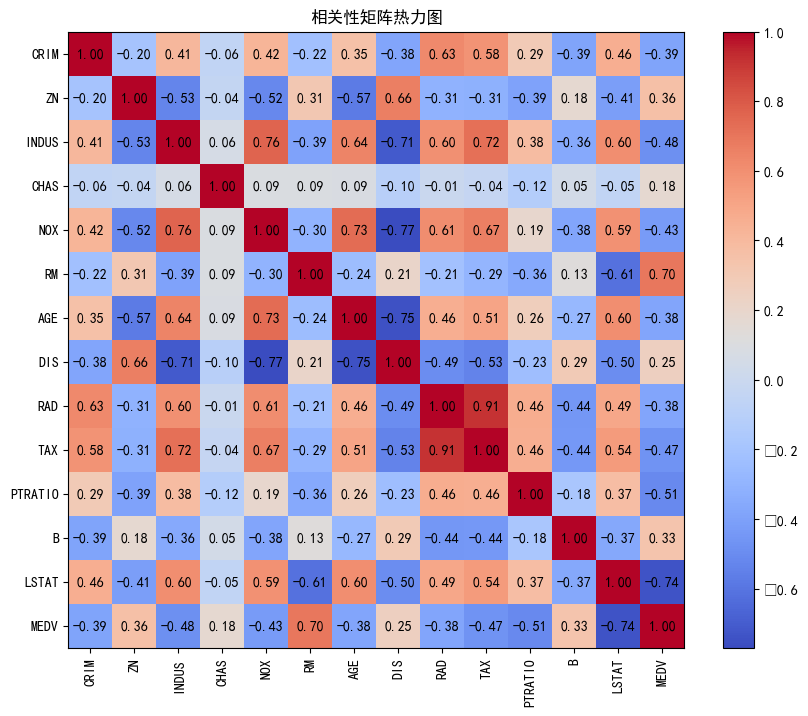

In [218]:
print(correlation)
plt.figure(figsize=(10, 8))  #设置图形大小
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')  # 使用imshow函数绘制热力图,camp是matplotlib内置映射参数
plt.colorbar()  #添加颜色条
plt.title('相关性矩阵热力图')  #设置标题
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)  # 设置x轴刻度和标签
plt.yticks(range(len(correlation.index)), correlation.index)  # 设置y轴刻度和标签
for i in range(len(correlation.index)):
    for j in range(len(correlation.columns)):
        plt.text(j, i, '{:.2f}'.format(correlation.iloc[i, j]), ha='center', va='center', color='black')
plt.show()

In [219]:
data=(data - data.mean()) / data.std()#标准差规范法

In [220]:
cols=data.shape[1]#划分数据集测试集
train_x=data.iloc[0:400, 0:cols - 1]
train_x=np.insert(train_x, 0, 1, axis=1)#插入第一列为1  400x14,后13列为样本,使后续w[0]为b偏置量
train_y=data.iloc[0:400, cols - 1:cols].values  # 最后一列为y

test_x=data.iloc[400:505, :cols - 1]
test_x=np.insert(test_x, 0, 1, axis=1)#105x14
test_y=data.iloc[400:505, cols - 1:cols].values

In [221]:
w=np.zeros((train_x.shape[1],1))#14x1
alpha=0.001#学习率
epochs=20000#迭代次数
mse_w,mse_array,lowest_mse,mse_epoch,   mae_w,mae_array,lowest_mae,mae_epoch,w = decent(train_x, train_y, w, alpha,epochs,test_x,test_y)
#mse_w参数向量,mse_array是mse数组,lowest_mse是最小mse,mse_epoch是MSE下最好迭代次数(+1),mae同理

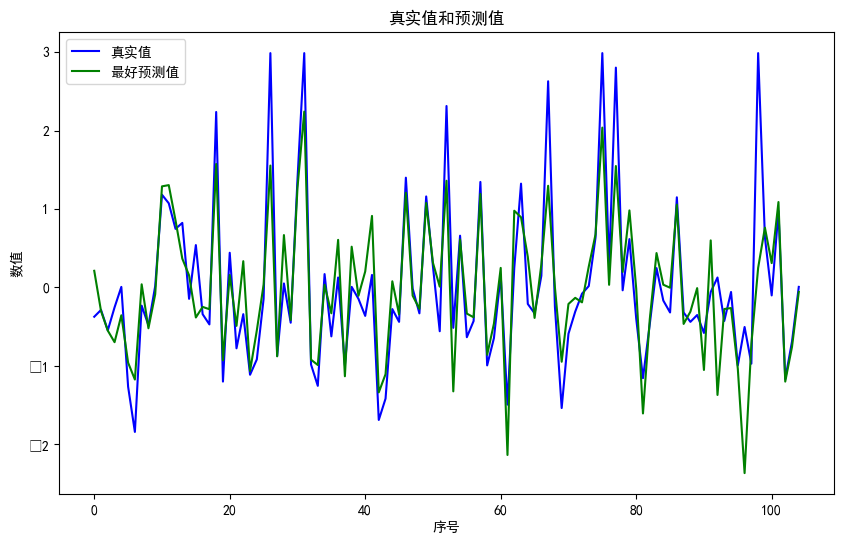

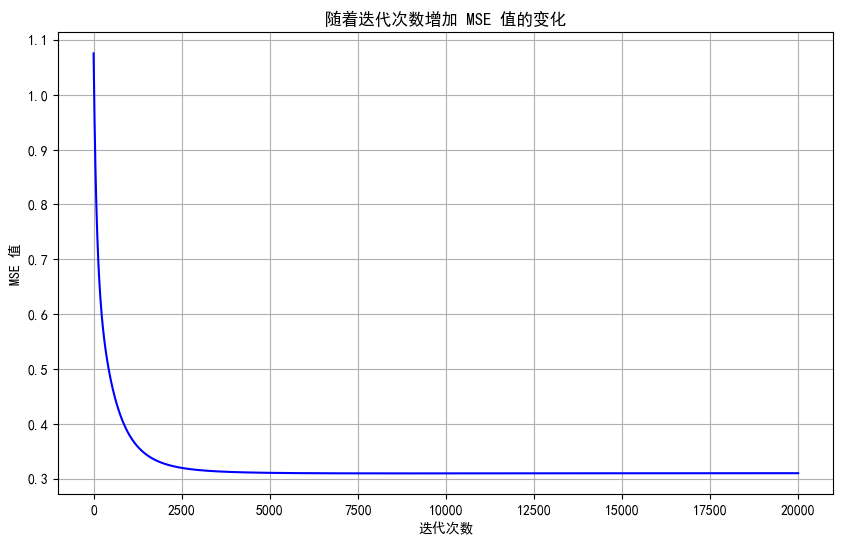

最好的MSE迭代次数是 9029
最好的MSE是 0.309345405850974


In [222]:
y_predict=np.dot(test_x, mse_w)
plt.rc("font", family='SimHei')
plt.figure(figsize=(10, 6))
#绘制真实值 test_y 的折线图
plt.plot(test_y, label='真实值', color='blue')
#绘制预测值 pred_y 的折线图
plt.plot(y_predict, label='最好预测值', color='green')
# 添加图例
plt.legend()
# 添加标签和标题
plt.xlabel('序号')
plt.ylabel('数值')
plt.title('真实值和预测值')
plt.show()

#mse变化曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), mse_array, color='blue')
plt.xlabel('迭代次数')
plt.ylabel('MSE 值')
plt.title('随着迭代次数增加 MSE 值的变化')
plt.grid(True)
plt.show()
print("最好的MSE迭代次数是", mse_epoch)
print("最好的MSE是", lowest_mse)

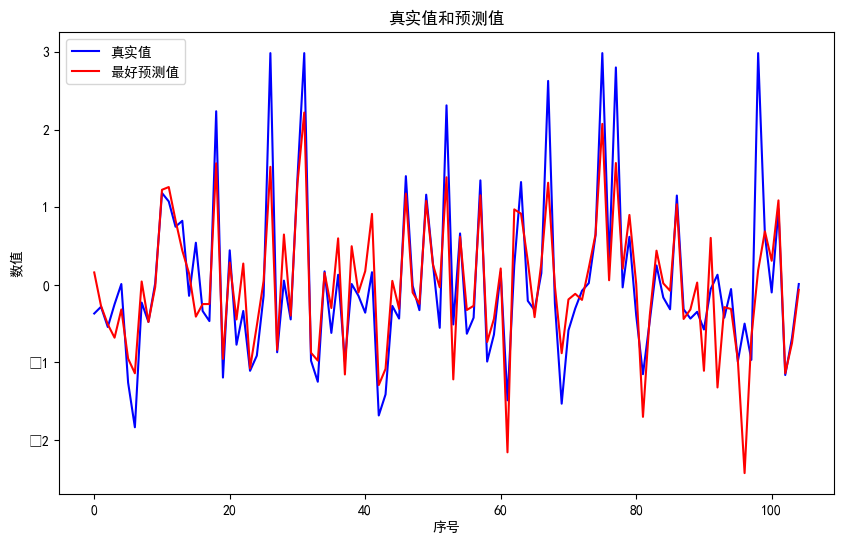

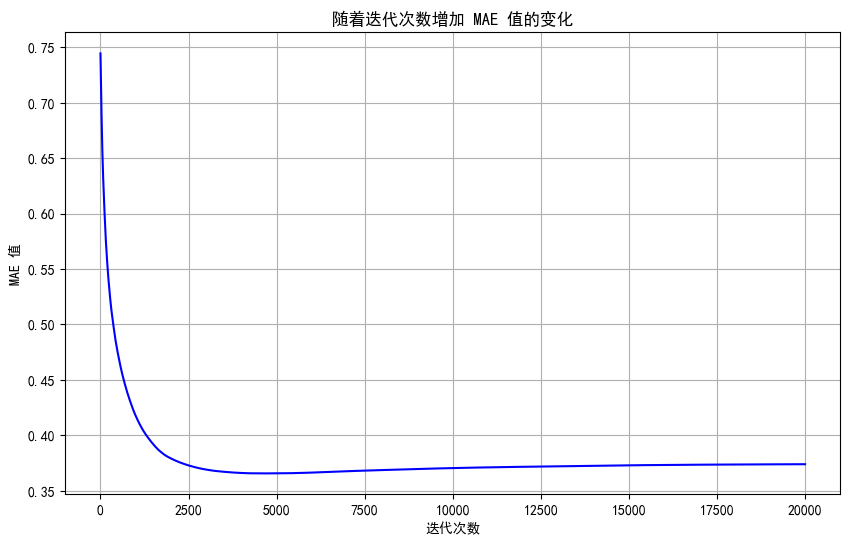

最好的MAE迭代次数是 4643
最好的MAE是 0.3656363290147692


In [223]:
y_predict=np.dot(test_x, mae_w)
plt.rc("font", family='SimHei')
plt.figure(figsize=(10, 6))
# 绘制真实值 test_y 的折线图
plt.plot(test_y, label='真实值', color='blue')
# 绘制预测值 pred_y 的折线图
plt.plot(y_predict, label='最好预测值', color='red')
plt.legend()
plt.xlabel('序号')
plt.ylabel('数值')
plt.title('真实值和预测值')
plt.show()

#mae变化曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), mae_array, color='blue')
plt.xlabel('迭代次数')
plt.ylabel('MAE 值')
plt.title('随着迭代次数增加 MAE 值的变化')
plt.grid(True)
plt.show()
print("最好的MAE迭代次数是", mae_epoch)
print("最好的MAE是", lowest_mae)

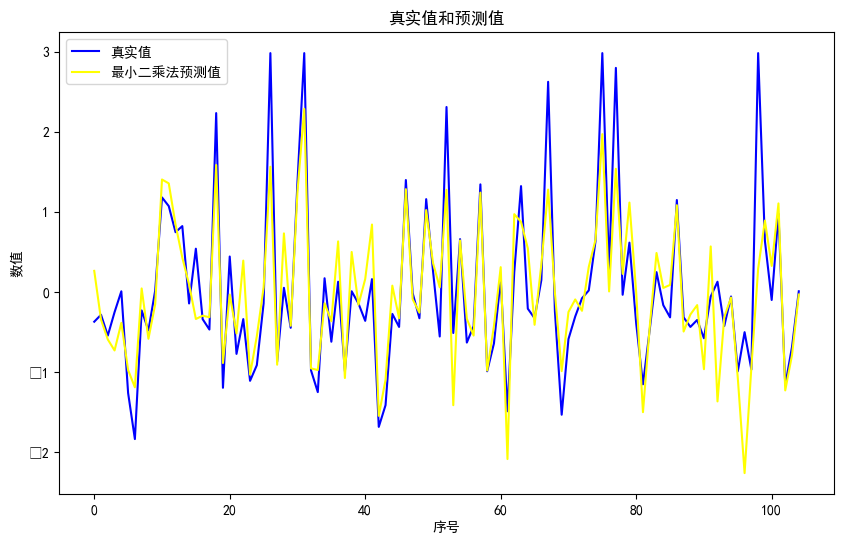

最小二乘法的MSE是 0.3101520800511518
最小二乘法的MAE是 0.3734428528373907
梯度下降和最小二乘法的MSE差值 0.000806674200177826
梯度下降和最小二乘法的MAE差值 0.007806523822621481


In [224]:
#最小二乘法的图像
w=np.zeros((train_x.shape[1],1))#清空w
w=least_squares(w,train_x, train_y)
y_predict=np.dot(test_x, w)
plt.rc("font", family='SimHei')
plt.figure(figsize=(10, 6))
plt.plot(test_y, label='真实值', color='blue')#真实值y
plt.plot(y_predict, label='最小二乘法预测值', color='yellow')#预测值y
plt.legend()
plt.xlabel('序号')
plt.ylabel('数值')
plt.title('真实值和预测值')
plt.show()
print("最小二乘法的MSE是",mse(y_predict,test_y))
print("最小二乘法的MAE是",mae(y_predict,test_y))
print("梯度下降和最小二乘法的MSE差值",mse(y_predict,test_y)-lowest_mse)
print("梯度下降和最小二乘法的MAE差值",mae(y_predict,test_y)-lowest_mae)